In [197]:
import glob
import numpy as np

import xarray as xr
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "DejaVu Serif"
plt.rcParams["font.weight"] = "normal"
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['figure.dpi'] = 300

In [181]:
x = sorted(glob.glob('v20_monthly_umm/*.nc'))
# y = xr.open_dataset(x[90])
# y.Rainfall.shape
len(x)

540

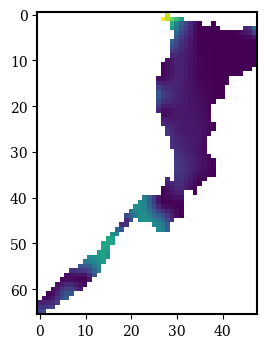

In [182]:
y = xr.open_dataset(x[100])
plt.imshow(y.Rainfall)

In [157]:
print(x[0][-5:-3])
print(x[0])
print(x[0][-10:-6])

01
v20_monthly_umm/umm_1970_01.nc
1970


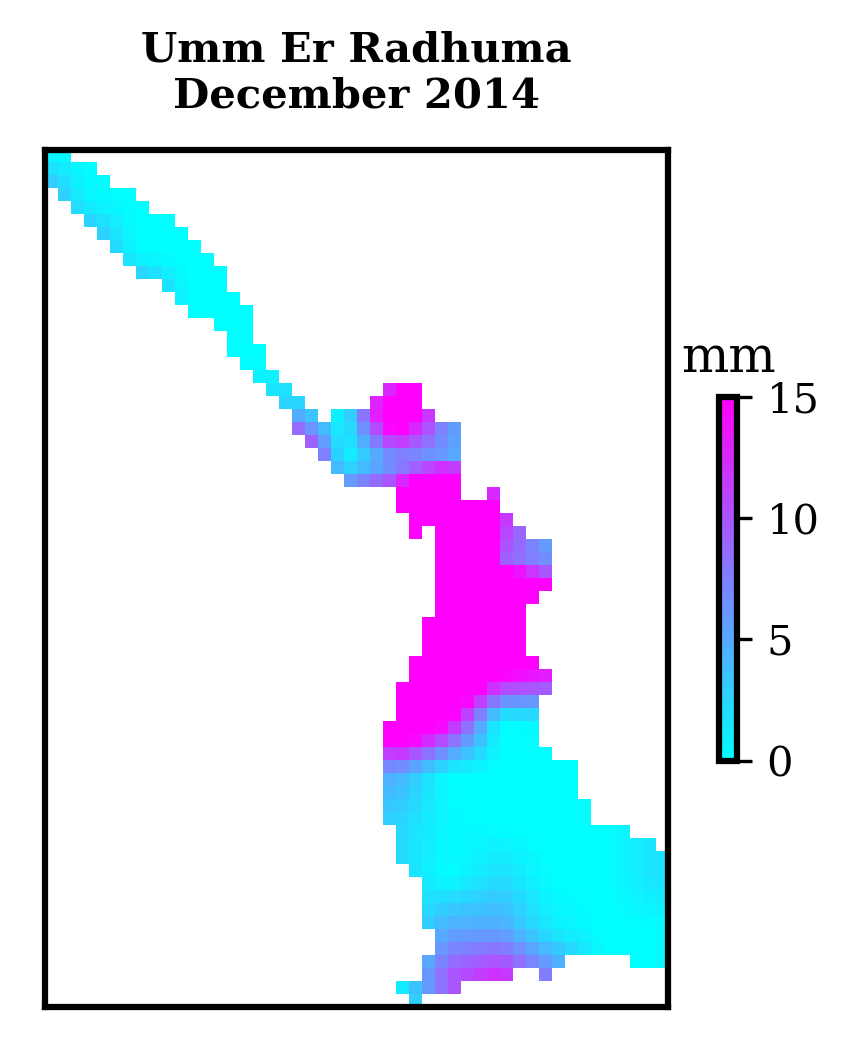

In [213]:
x = sorted(glob.glob('v20_monthly_umm/*.nc'))
from numpngw import AnimatedPNGWriter


mons = {
    "01":"January",
    "02":"February",
    "03":"March",
    "04":"April",
    "05":"May",
    "06":"June",
    "07":"July",
    "08":"August",
    "09":"September",
    "10":"October",
    "11":"November",
    "12":"December"}

frames = []
fig,ax = plt.subplots(figsize=(3,3.6))
for idx,i in enumerate(x):
    j = xr.open_dataset(i)
    imshow = ax.imshow(np.flipud(j.Rainfall),cmap='cool',vmin=0,vmax=15)
    title = ax.text(0.5,
                    1.05,
                    f'Umm Er Radhuma\n{mons[str(i[-5:-3])]} {i[-10:-6]}',
                    fontweight='bold',
                    ha="center",
                    transform=ax.transAxes)
    plt.xticks([])
    plt.yticks([])
    frames.append([imshow,title])
   
    # if idx == 10:
    #     break

cbr=plt.colorbar(imshow,pad=.07,fraction=.025)
cbr.ax.set_title('mm')
fig.tight_layout()
ani = animation.ArtistAnimation(fig, frames, interval=1000, blit=False,
                                repeat_delay=1000)


writer = AnimatedPNGWriter(fps=1)
ani.save("umm_v20.png",writer=writer,dpi=100,savefig_kwargs=dict(facecolor='white'))

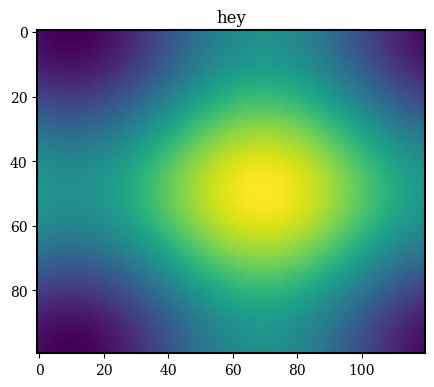

In [153]:

import matplotlib.animation as animation
from matplotlib.animation import PillowWriter


fig = plt.figure(figsize=(5,5))

def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(20):
    x += np.pi / 15.
    y += np.pi / 20.
    im = plt.imshow(f(x, y))
    ims.append([im])
plt.title('hey')

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=False,
                                repeat_delay=500)


writer = AnimatedPNGWriter(fps=20)
ani.save("demo2.png",writer=writer,dpi=100)

plt.show()

In [137]:
animation.writers.list()

['pillow', 'html']